# Cs / K Breeding @ REX w/ NAGun

In [1]:
import ebisim as eb
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 100

## Simulation setup

First we define the Potassium and Ceasium targets (see comments in code for explanation)

In [2]:
k = eb.Target.get_ions(
    element="K",
    nl=1.2e5, # Linear 1+ ion density at t=0 [1/m]
    kT=80 # thermal energy at t=0 [eV] - Mostly relevant for the initial radial spread
)
cs = eb.Target.get_ions(
    element="Cs",
    nl=1.2e5,
    kT=80
)

The densities I have chosen here are extremely small, there is virtually no compensation in order to exclude funny effects that could arise from that.

Next up the "definition" of the Device, i.e. EBIS

In [3]:
dev = eb.Device.get(
    current=0.295, # Beam current [A]
    e_kin=6500, # Nominal beam energy [eV]
    r_e=150e-6, # Beam radius [m]
    length=0.8, # Trap length - Irrelevant
    v_ax=2000, # Axial trapping voltage [V]
    b_ax=2, # Axial magnetic field [T]
    r_dt=0.005, # Drift tube radius [m]
    n_grid=1000, # Finite difference solver mesh
)

Next cell runs the simulations

In [4]:
# Potassium simulation
kres = eb.advanced_simulation(dev, k, t_max=0.1, options=eb.ModelOptions(RADIAL_DYNAMICS=True), solver_kwargs={"dense_output":True}, rates=True, n_threads=4)

# Caesium simulation with same parameters
cres = eb.advanced_simulation(dev, cs, t_max=0.1, options=eb.ModelOptions(RADIAL_DYNAMICS=True), solver_kwargs={"dense_output":True}, rates=True, n_threads=4)


Integration finished: 6402 calls                    
The solver successfully reached the end of the integration interval.
Calls: 6402 of which ~3249 normal (50.75%) and ~3120 for jacobian approximation (48.73%)
Rates finished: 247 rates

Integration finished: 22704 calls                    
The solver successfully reached the end of the integration interval.
Calls: 22704 of which ~5908 normal (26.02%) and ~16688 for jacobian approximation (73.50%)
Rates finished: 413 rates



## K results

**************************************************
Largest abundance for K10+: 6.2 ms
**************************************************


/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:493: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)
/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:493: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


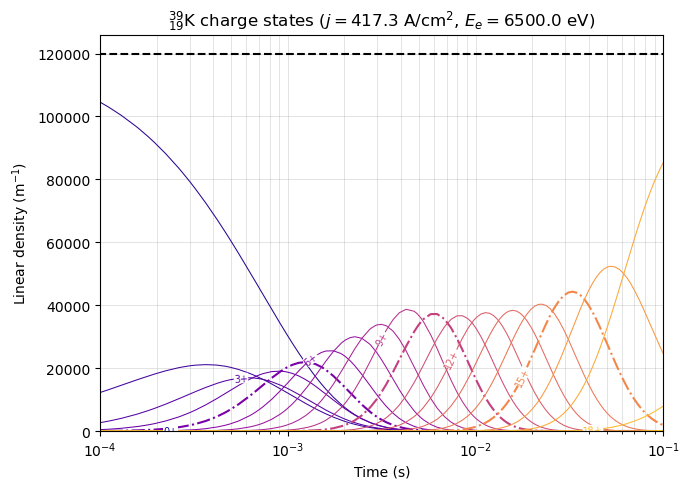

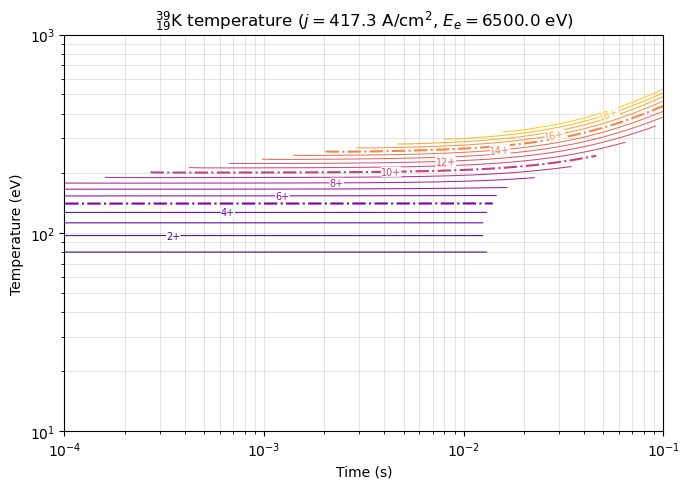

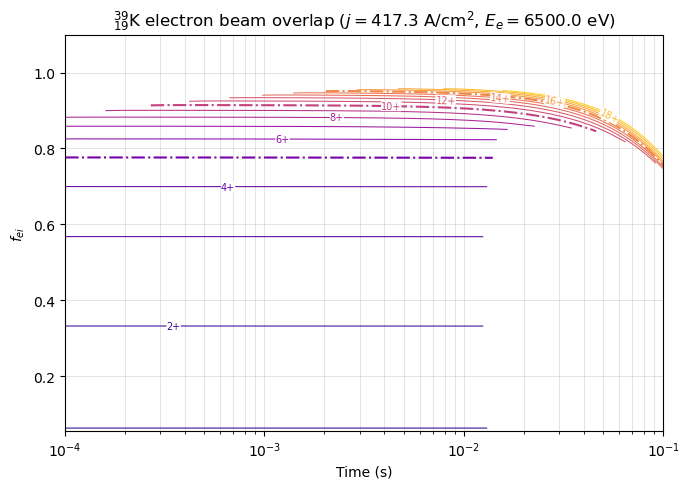

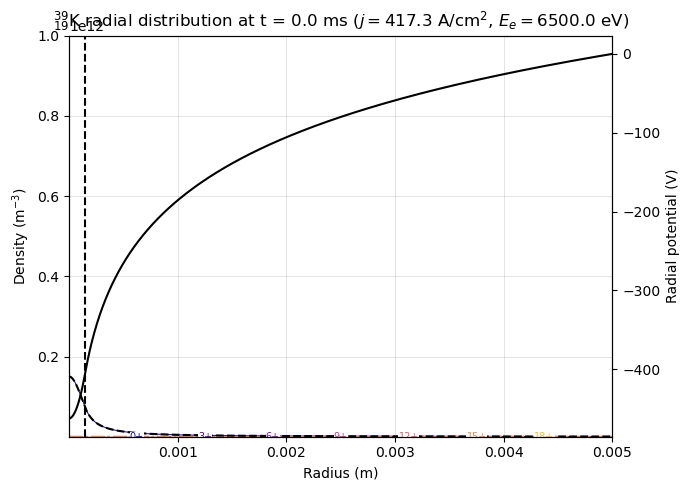

In [5]:
print(50*"*")
print(f"Largest abundance for K10+: {1000*kres.times_of_highest_abundance()[10]:.1f} ms")
print(50*"*")
_ = kres.plot()
_ = kres.plot_temperature()
_ = kres.plot_rate(eb.Rate.F_EI) # Beam overlap factors
_ = kres.plot_radial_distribution_at_time(0, xscale="linear", yscale="linear")

## Cs Results

**************************************************
Largest abundance for Cs31+: 45.5 ms
**************************************************


/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:493: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)
/home/hpahl/Repos/EBISSimulation/ebisim/plotting.py:493: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


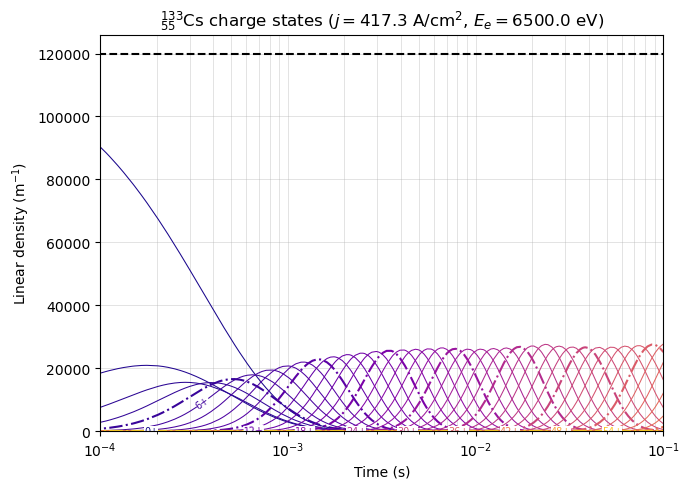

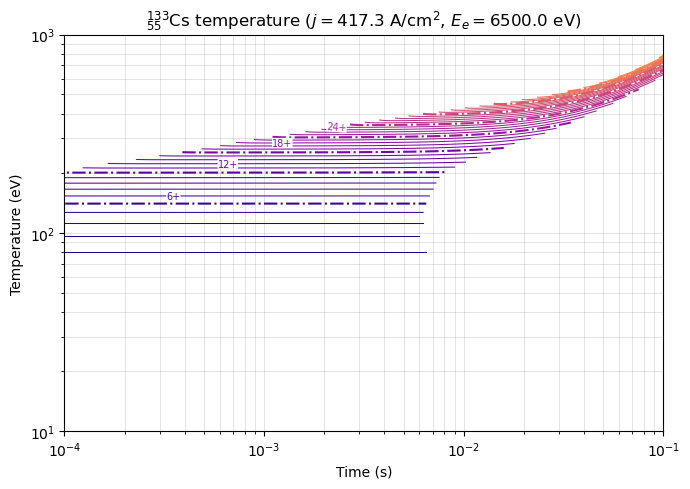

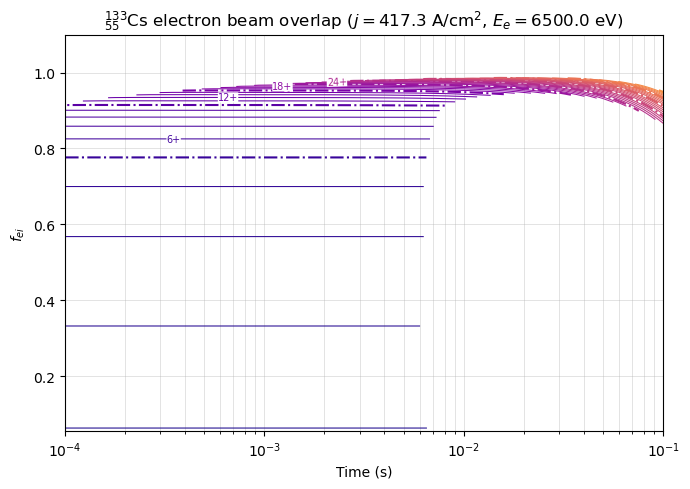

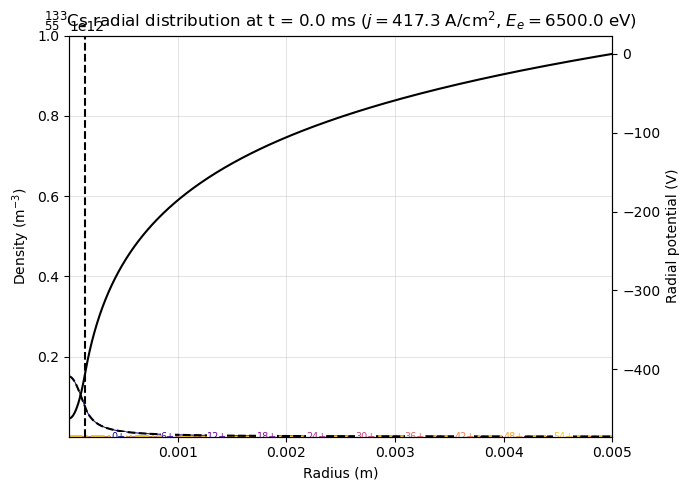

In [6]:
print(50*"*")
print(f"Largest abundance for Cs31+: {1000*cres.times_of_highest_abundance()[31]:.1f} ms")
print(50*"*")
_ = cres.plot()
_ = cres.plot_temperature()
_ = cres.plot_rate(eb.Rate.F_EI) # Beam overlap factors
_ = cres.plot_radial_distribution_at_time(0, xscale="linear", yscale="linear")

## Conclusion

By assigning a large initial thermal energy to the ions, we can emulate "poor" injection, i.e. a fraction of the injected ions orbits the beam, leading to an initial breeding delay.
This can seemingly explain the lower effective current density for reaching K10+ as compared to Cs31+.

For once the charge breeding time for Cs31+ is longer to start with so the intial delay is less significant in comparison to the total breeding time.
Secondly, the overlap of the ions cloud with the electron beam improves for higher charge states.
